## Conjunto de datos de marketing bancario:

> Los datos están relacionados con campañas de marketing directo (llamadas telefónicas) de una institución bancaria portuguesa.<br>
El objetivo de la clasificación es predecir si el cliente suscribirá un depósito a plazo (variable y).

|Header |  Definition|
|---|---------|
|`Age`|Edad del cliente|
|`Job` |trabajo del cliente|
|`Martial` | Estado civil del cliente|
|`Education` |Nivel de educación del cliente|
|`Default` | ¿Tiene el crédito en mora?|
|`Housing` | Si el cliente tiene préstamo de vivienda|
|`Loan` | Tiene Préstamo Personal|
|`Balance` | Saldo individual del cliente|
|`Contact` | Tipo de comunicación|
|`Month` | Último mes de contacto del año|
|`Day` | Último día de contacto de la semana|
|`Duration` | Duración del último contacto, en segundos|
|`Campaign` | Número de contactos realizados durante esta campaña y para este cliente|
|`Pdays` | Número de días que pasaron desde la última vez que se contactó al cliente de una campaña anterior|
|`Previous` | Número de contactos realizados antes de esta campaña y para este cliente|
|`Poutcome` | resultado de la campaña de marketing anterior|
|`Y` | ¿El cliente ha suscrito un depósito a plazo?|

### **Librerias utilizadas**


*   **Librerías básicas**

  1.   **Numpy (np):** Líbrería util para realizar cálculos lógicos sobre cuadros y matrices.
  2.   **Pandas (pd):** Librería para la manipulación y análisis de datos estructurados en DataFrames y Series, de código abierto, rápido, potente, flexible y facil de usar.
* **Librerías de visualización**
  1. **matplotlib.pylot (plt):**  Librería para creación de gráficos y figuras estáticas.
  2. **Seaborn(sns):** Librería basada en matplotlib que facilita la creación de visualizaciones informativas de alta calidad.
* **Librerías de aprendizaje automático**
  1. **Imblearn:** Librería específica para el manejo del desequilibrio de clases en conjuntos de datos de aprendizaje automático.
    - imblearn.over_sampling: Sub-librería de imblearn que contiene técnicas para sobremuestrear la clase minoritaria (aumentar su tamaño). Ejemplos: ADASYN, SMOTE.
    - imblearn.under_sampling: Sub-librería de imblearn que contiene técnicas para submuestrear la clase mayoritaria (reducir su tamaño). Ejemplo: RandomUnderSampler.
* **Librería de preprocesamiento de datos:**
  1. **sklearn.preprocessing:** Sub-módulo de sklearn que contiene herramientas para preparar los datos antes de entrenar un modelo.
    - OneHotEncoder: Codificador que transforma características categóricas nominales en representaciones binarias one-hot encoding.
    - OrdinalEncoder: Codificador que transforma características categóricas ordinales en representaciones numéricas enteras.

In [3]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import ADASYN, SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

+ **Importar el conjunto de datos**

In [4]:
datos = pd.read_csv('/content/bank_full.csv')
# dimensión
datos.shape

(45211, 17)

Se configura la opción `max_columns` de pandas para mostrar todas las columnas del conjunto de datos. Luego mediante el método de `.sample()` , se obtiene una muestra aleatoria de 5 filas del conjunto de datos datos.

In [5]:
# Exploración y análisis de los datos
pd.options.display.max_columns = None
datos.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
34396,46,management,married,unknown,no,3082,no,no,telephone,4,may,157,3,-1,0,unknown,no
33561,30,technician,single,secondary,no,3313,yes,no,telephone,20,apr,534,3,319,3,failure,no
11621,43,admin.,single,unknown,no,682,no,no,unknown,19,jun,156,6,-1,0,unknown,no
8015,31,blue-collar,married,secondary,no,0,yes,no,unknown,2,jun,245,1,-1,0,unknown,no
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes


Mediante la función `reset_option` es utilizada para restablecer la opción `display.max_columns` a su valor predeterminado, que normalmente es 50, siendo así que los dataFrames volverán a mostrarse con un máximo de columnas definido por el valor predeterminado de pandas, entonces hace que despúes de la exploración de datos al hacer visibles todas las columnas, se revierte esto evitando así que los DataFrames grandes se impriman por completo y se mejora la legibilidad de la salida.

In [6]:
### Revertimos el maximo de columnas visibles
pd.reset_option('display.max_columns')
datos.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### **Realiza el analisis descriptivo y grafico del conjunto de datos**

**Analisis Descriptivo**
Considera al menos los siguientes puntos:
> + Qué tipos de datos maneja el conjunto?



In [7]:
print(datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


> + Cuantos valores distintos tiene por variable categorica?


In [8]:
# Separar las variables categóricas y numéricas
cat_vars = [col for col in datos.columns if datos[col].dtype == 'object' and col != 'y']
num_vars = [col for col in datos.columns if datos[col].dtype != 'object']
# Contar los valores distintos para cada variable categórica
distinct_values = {col: datos[col].nunique() for col in cat_vars}
# Contar los valores distintos para cada variable categórica
distinct_values = {col: datos[col].nunique() for col in cat_vars}

# Imprimir las variables categóricas y numéricas
print("Variables categóricas:")
print(cat_vars)

print("\nVariables numéricas:")
print(num_vars)

# Imprimir los resultados de los valores distintos para cada variable categórica
print("\nCantidad de valores distintos por variable categórica:")
for col, count in distinct_values.items():
    print(f'La variable categórica {col} tiene {count} valores distintos.')


Variables categóricas:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

Variables numéricas:
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

Cantidad de valores distintos por variable categórica:
La variable categórica job tiene 12 valores distintos.
La variable categórica marital tiene 3 valores distintos.
La variable categórica education tiene 4 valores distintos.
La variable categórica default tiene 2 valores distintos.
La variable categórica housing tiene 2 valores distintos.
La variable categórica loan tiene 2 valores distintos.
La variable categórica contact tiene 3 valores distintos.
La variable categórica month tiene 12 valores distintos.
La variable categórica poutcome tiene 4 valores distintos.


> + el conjunto de datos posee nulos?, cuantos?

In [9]:
# Verificar si hay valores faltantes
print(datos.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64



**Analisis grafico**

Considera al menos los siguientes graficos:
> + Gráfico de cajas

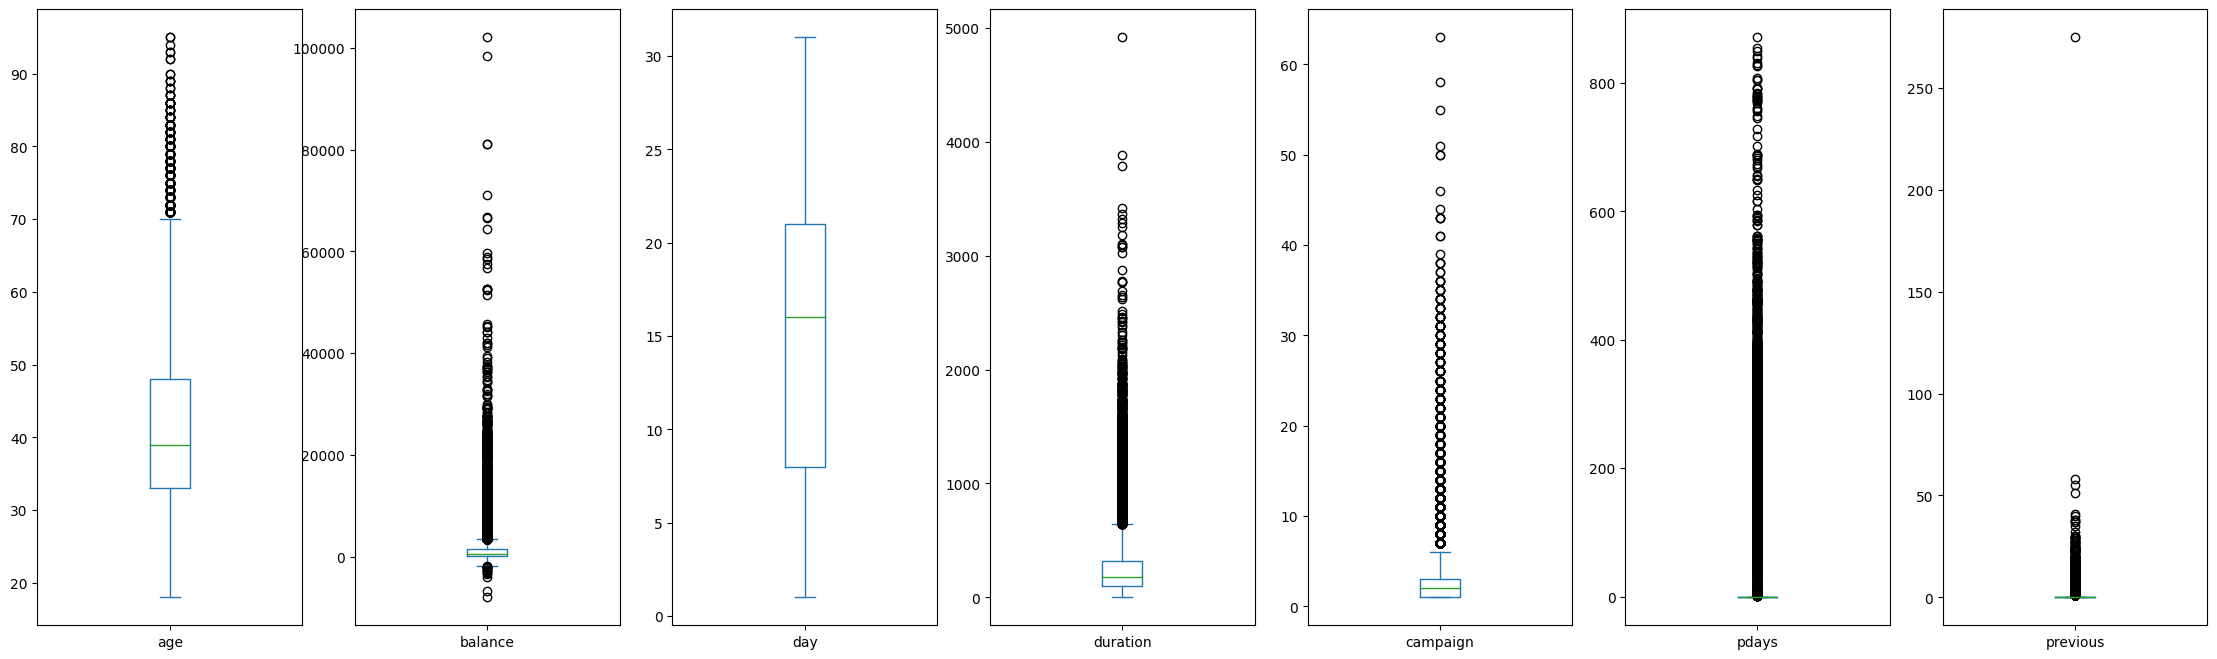

In [10]:
# Gráfico de cajas de las variables numéricas
datos.plot(kind='box', subplots=True,figsize=(28,8), sharex=False, sharey=False)
plt.show()

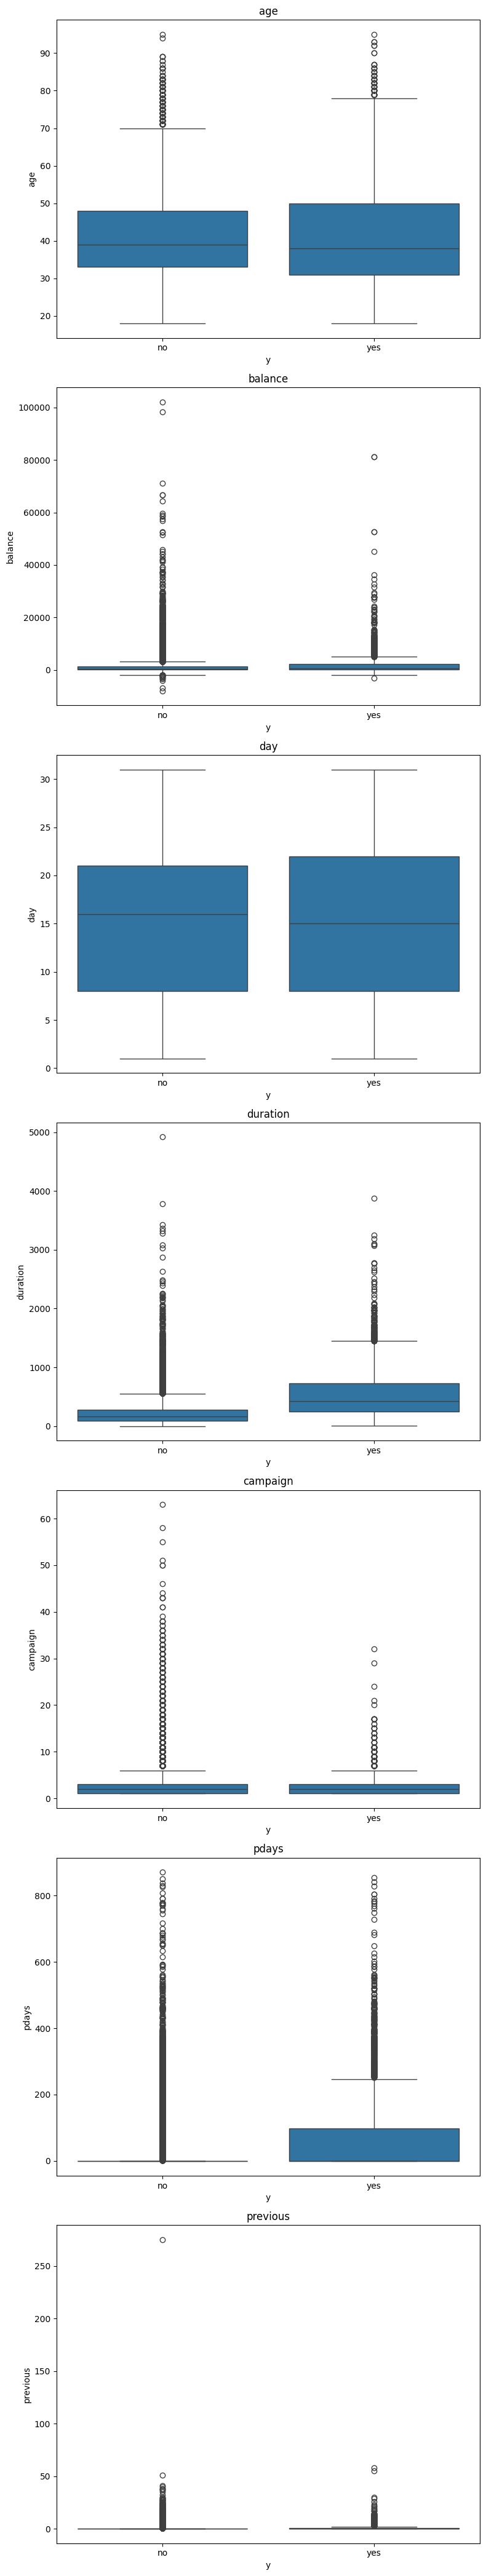

In [11]:
# Crear la figura con subplots
fig, axs = plt.subplots(len(num_vars), 1, figsize=(8, 6*len(num_vars)))
axs = axs.flatten()

# Crear los gráficos de caja para las variables numéricas
for i, col in enumerate(num_vars):
    sns.boxplot(x="y", y=col, data=datos, ax=axs[i])
    axs[i].set_title(f"{col}")

# Ajustar los subplots y mostrar la figura
fig.tight_layout()
plt.show()

> + Histogramas

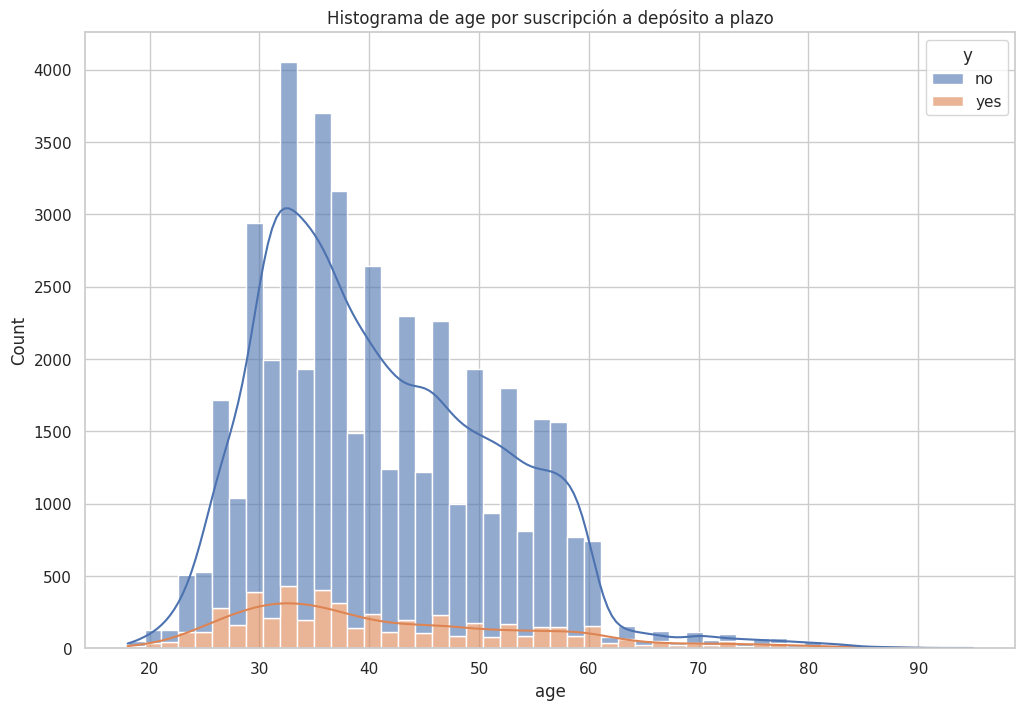

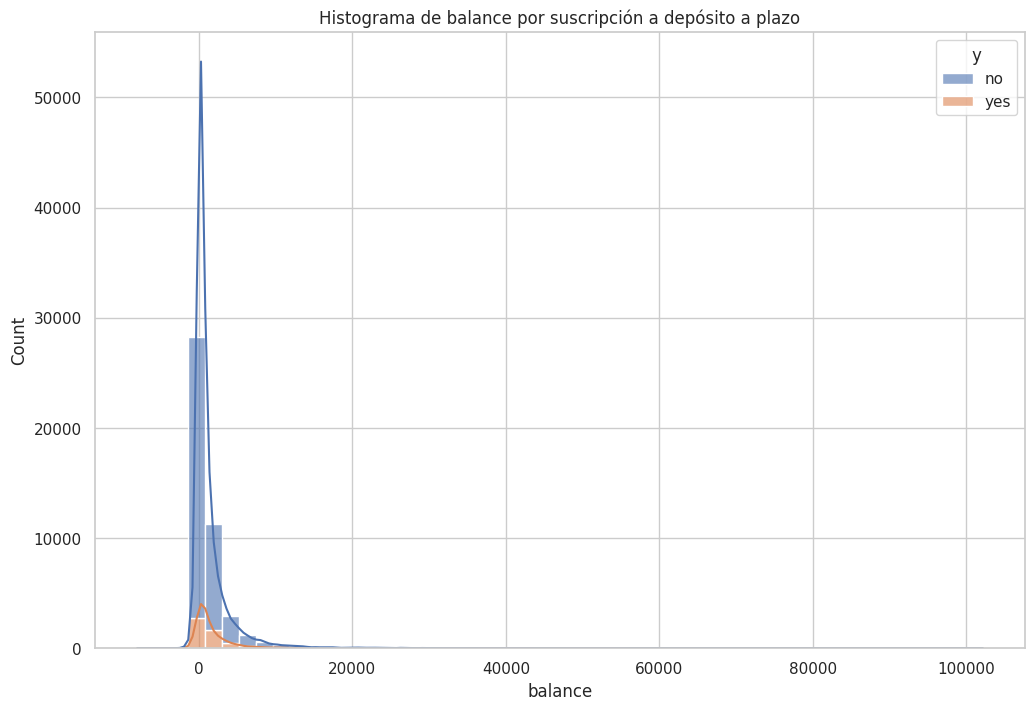

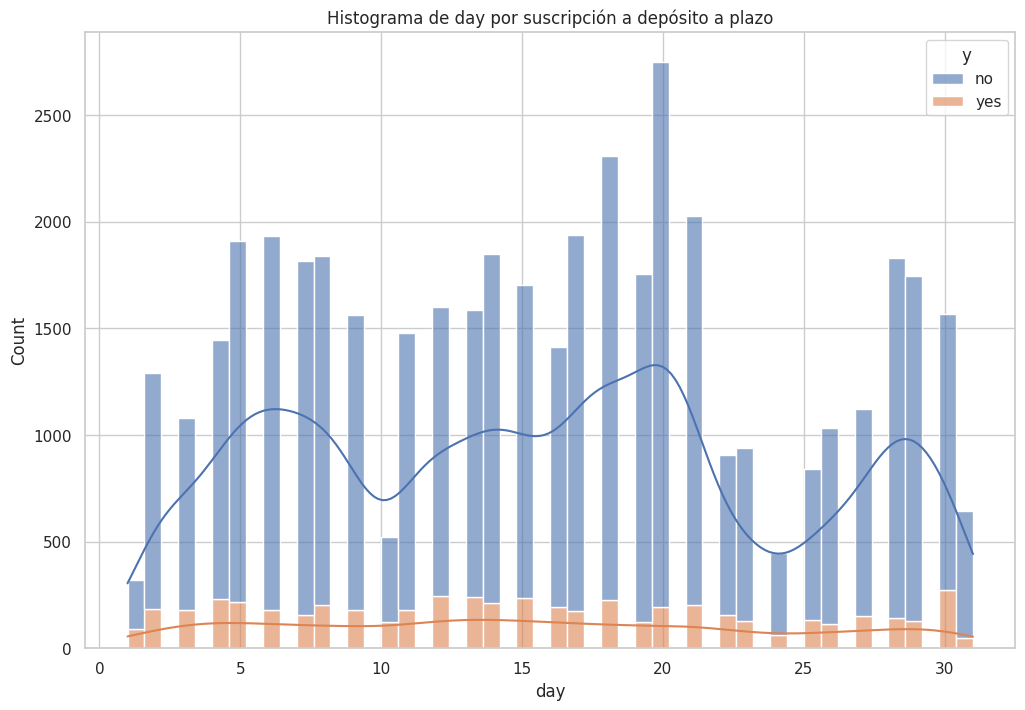

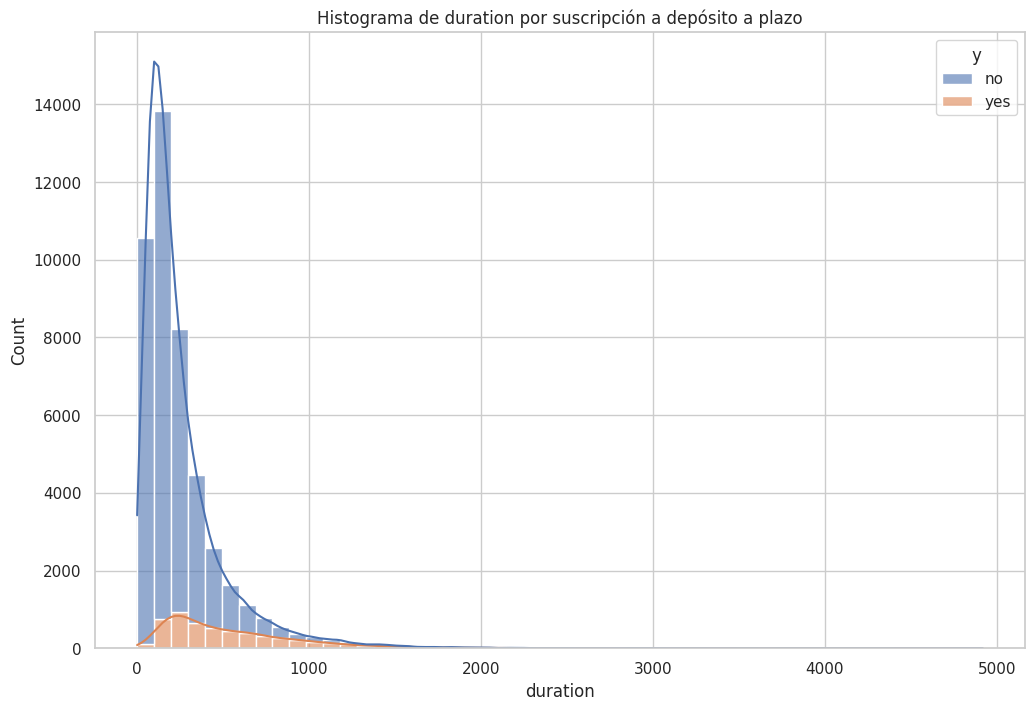

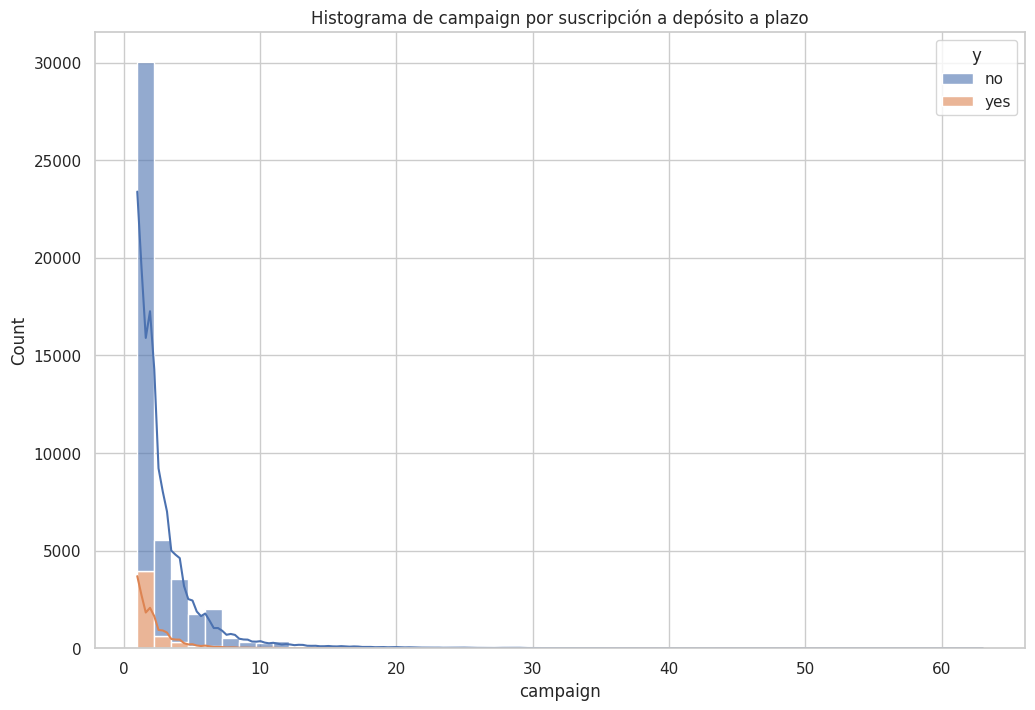

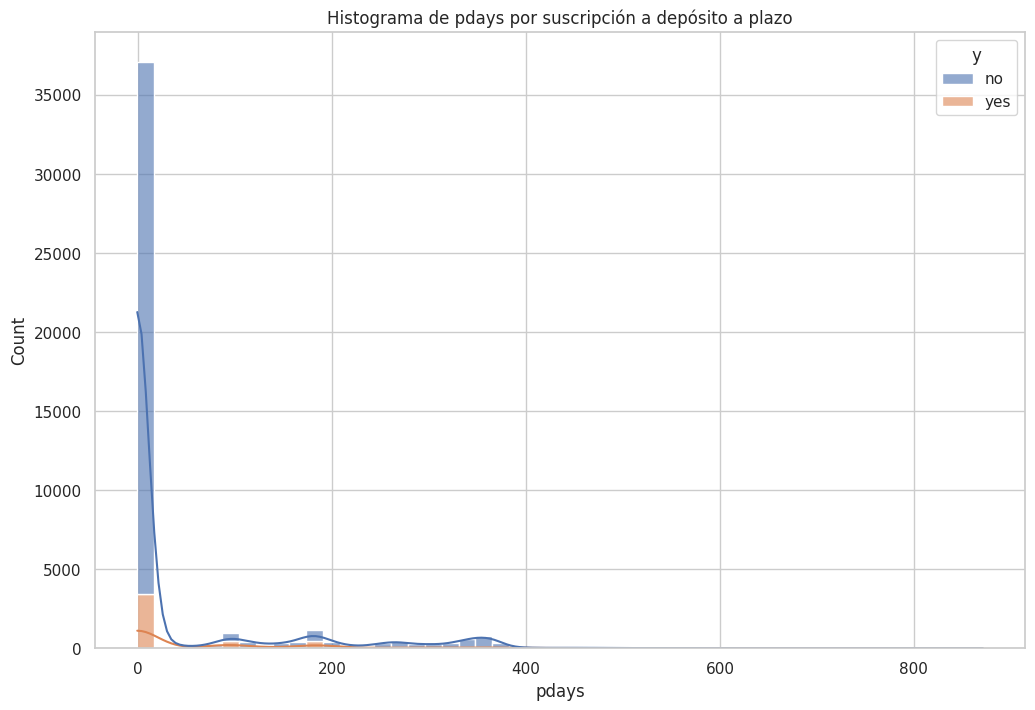

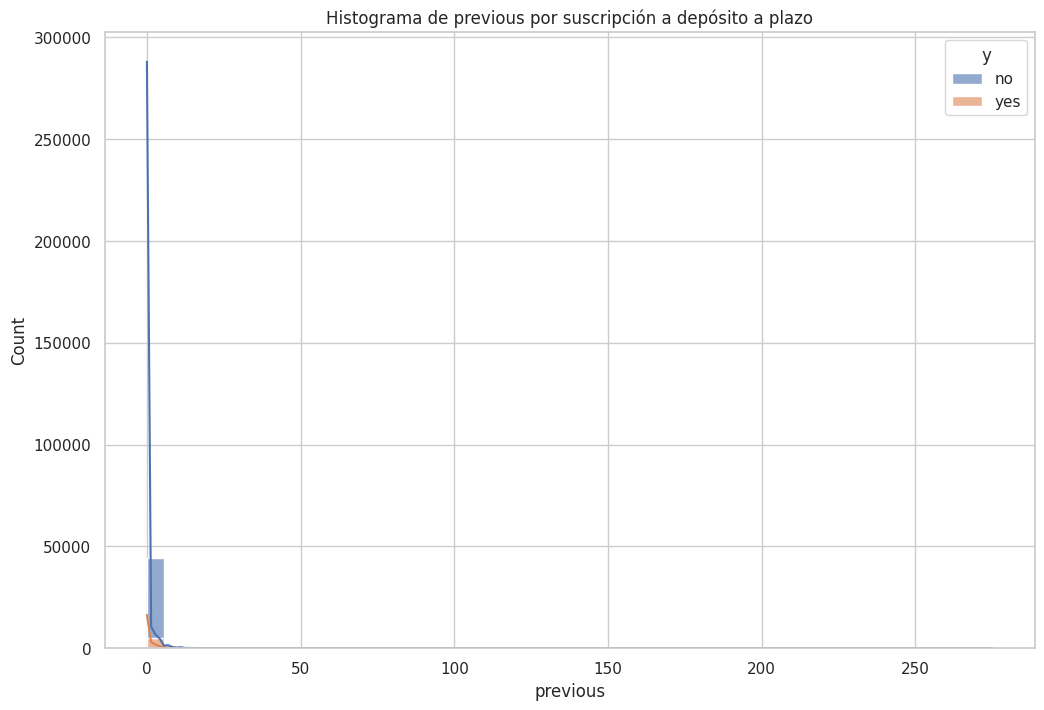

In [12]:
# Configuración del estilo de seaborn
sns.set(style='whitegrid', context='notebook')

# Crear histogramas para todas las variables numéricas separadas por la variable y
for col in num_vars:
    plt.figure(figsize=(12, 8))
    sns.histplot(data=datos, x=col, hue='y', multiple='stack', bins=50, kde=True, alpha=0.6)

    # Título y etiquetas
    plt.title(f'Histograma de {col} por suscripción a depósito a plazo')
    plt.xlabel(col)
    plt.ylabel('Count')

    # Mostrar el gráfico
    plt.show()

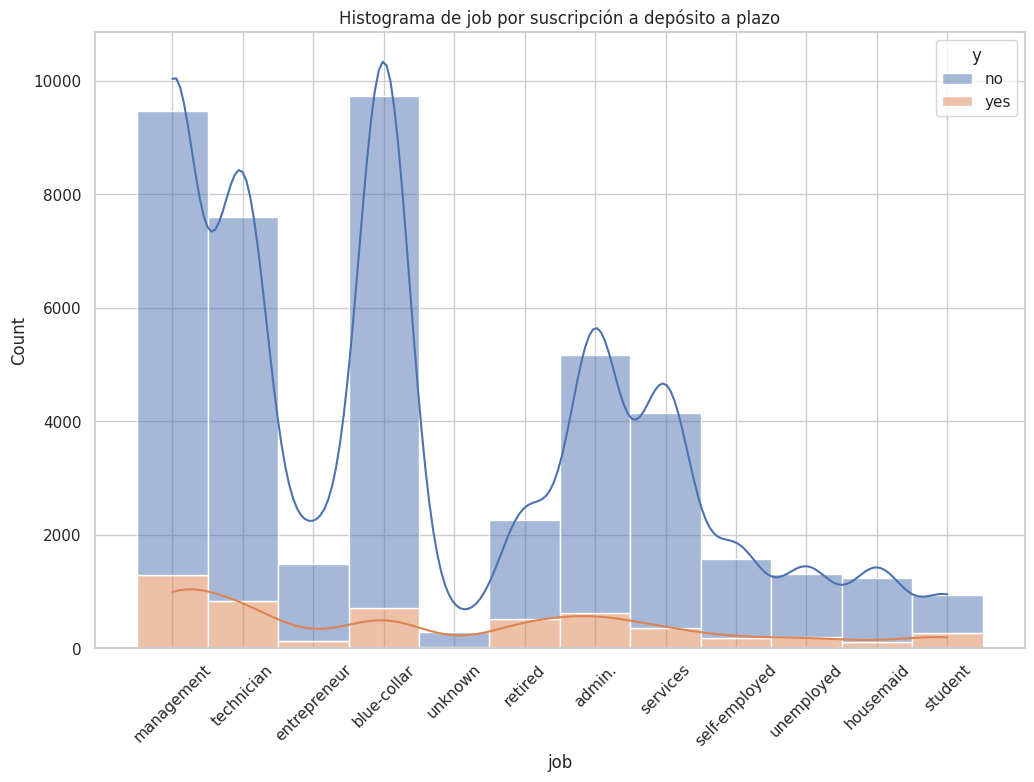

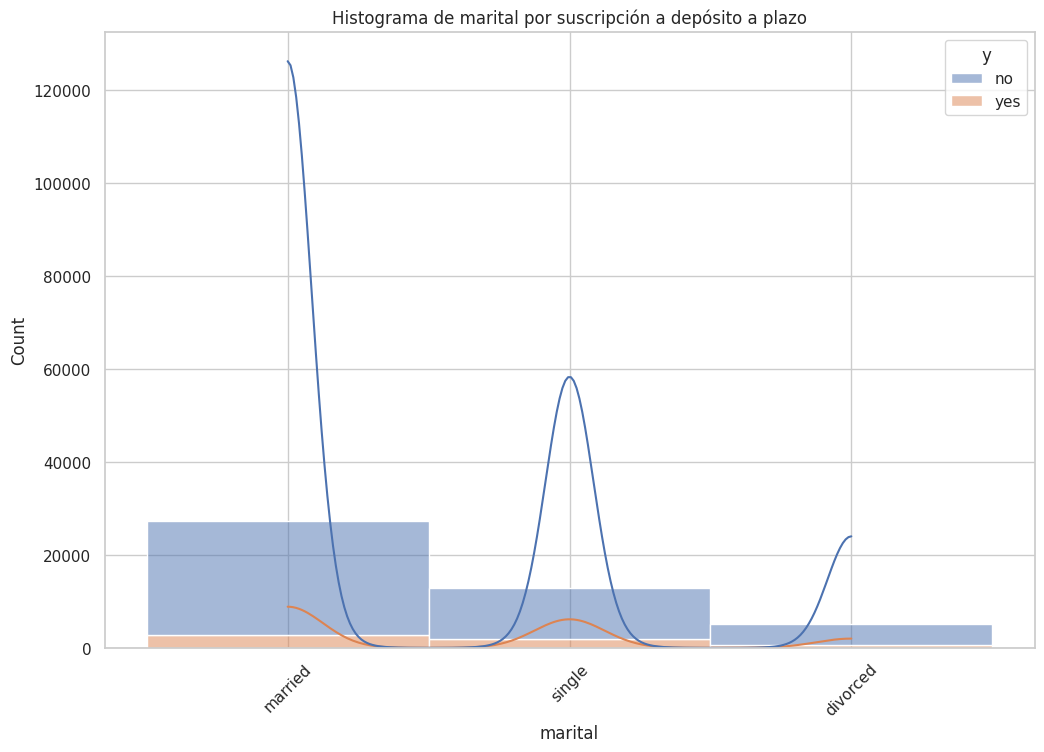

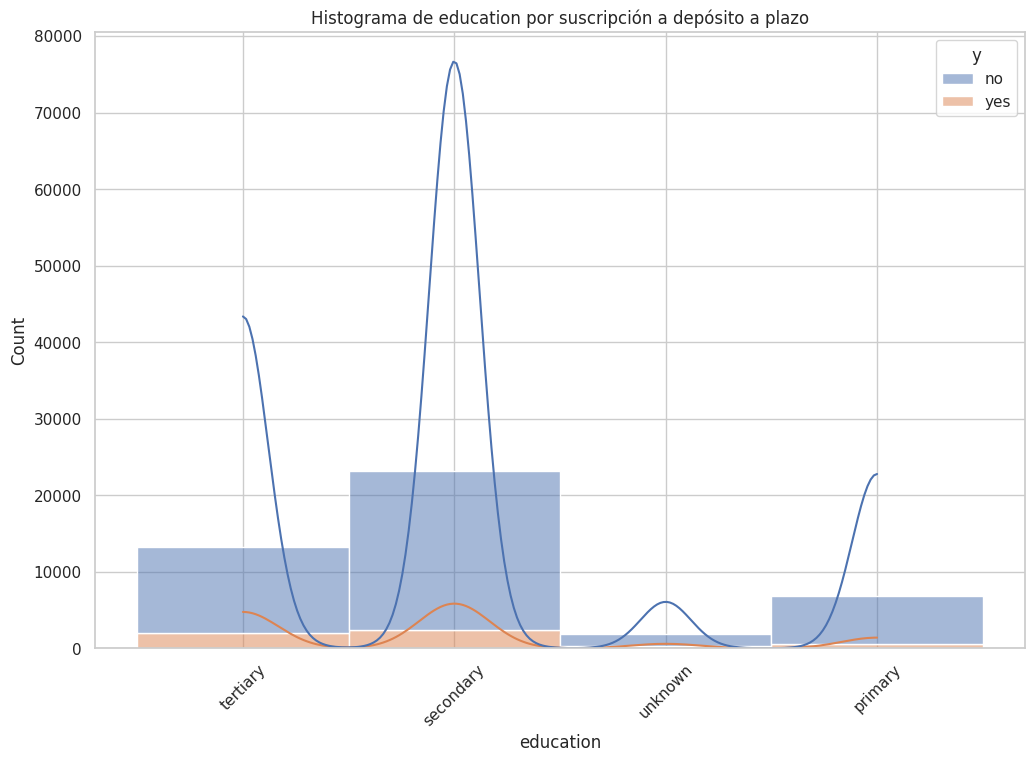

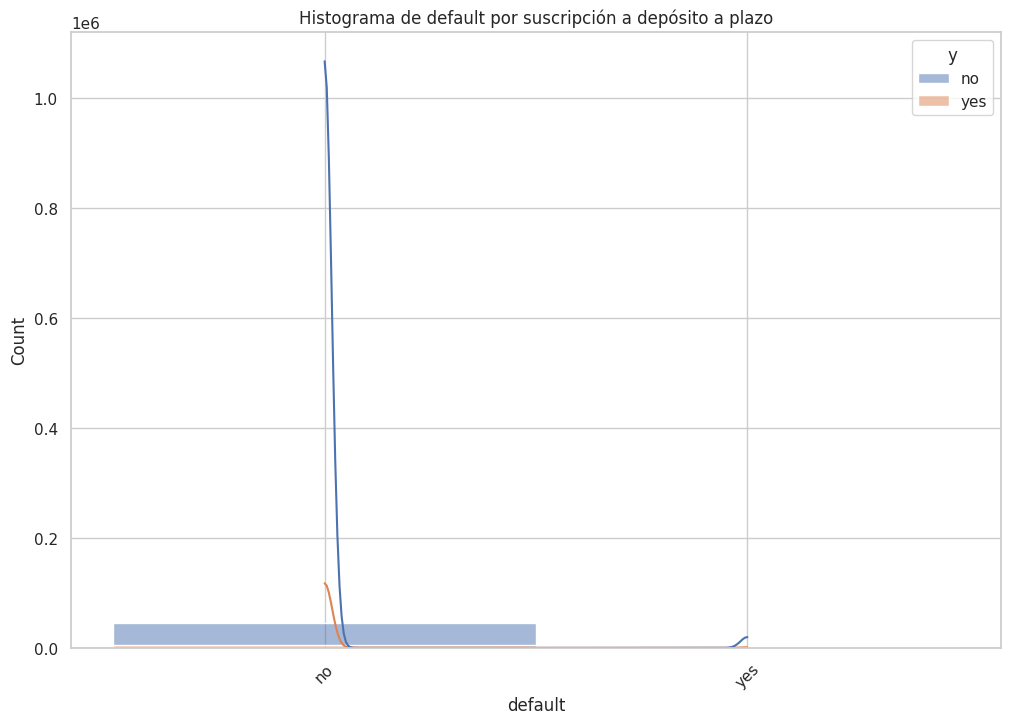

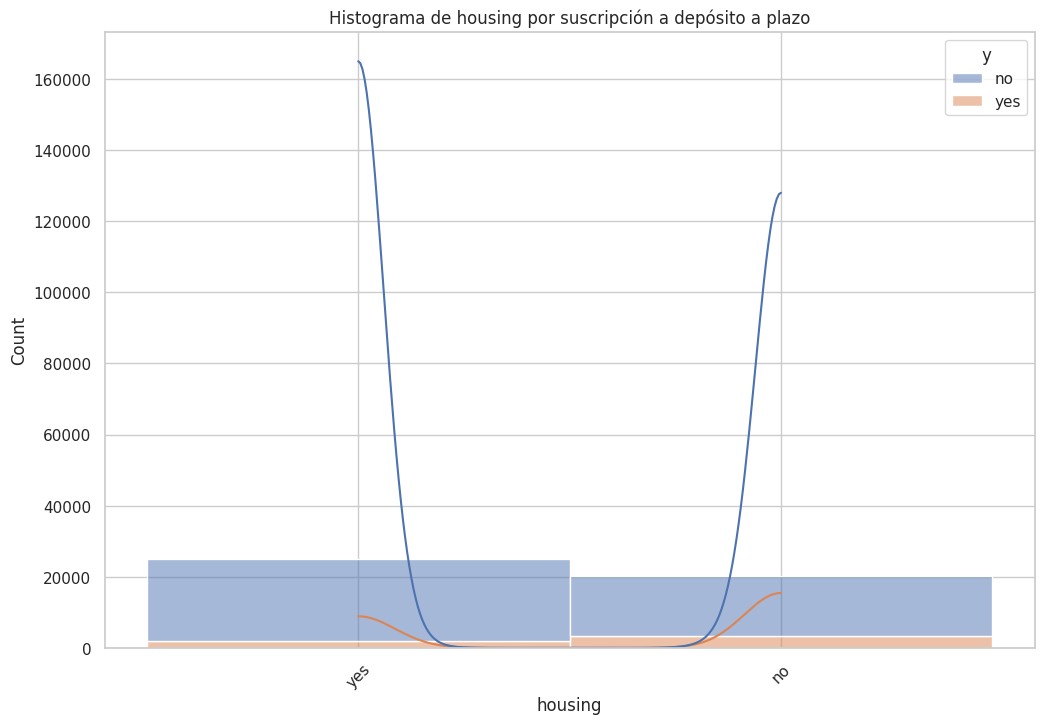

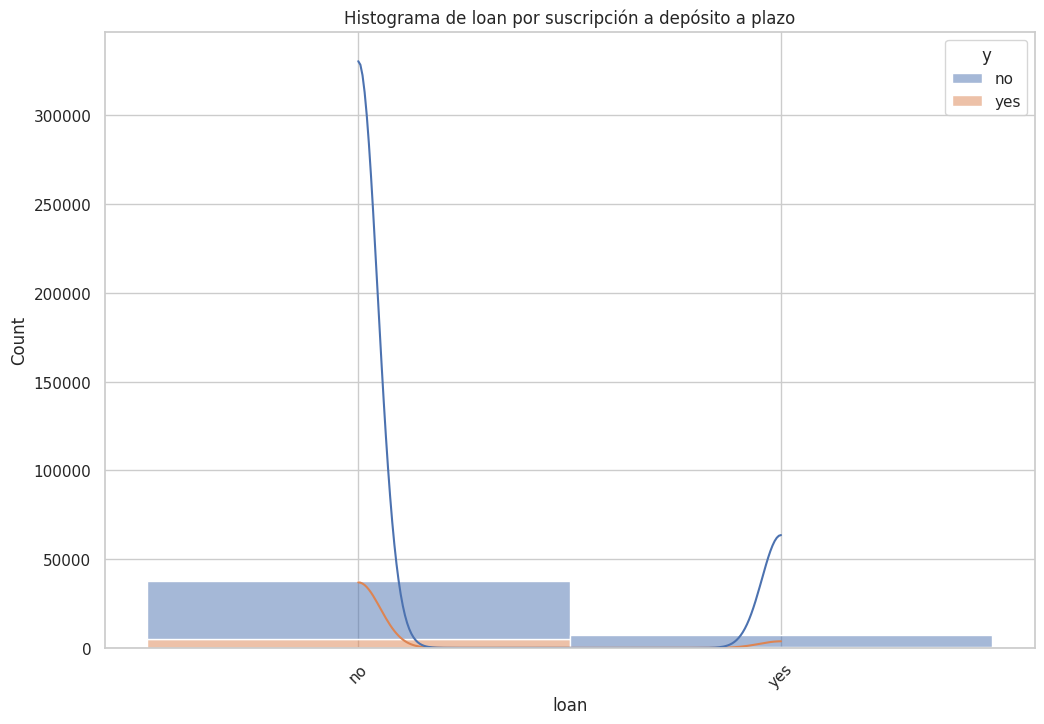

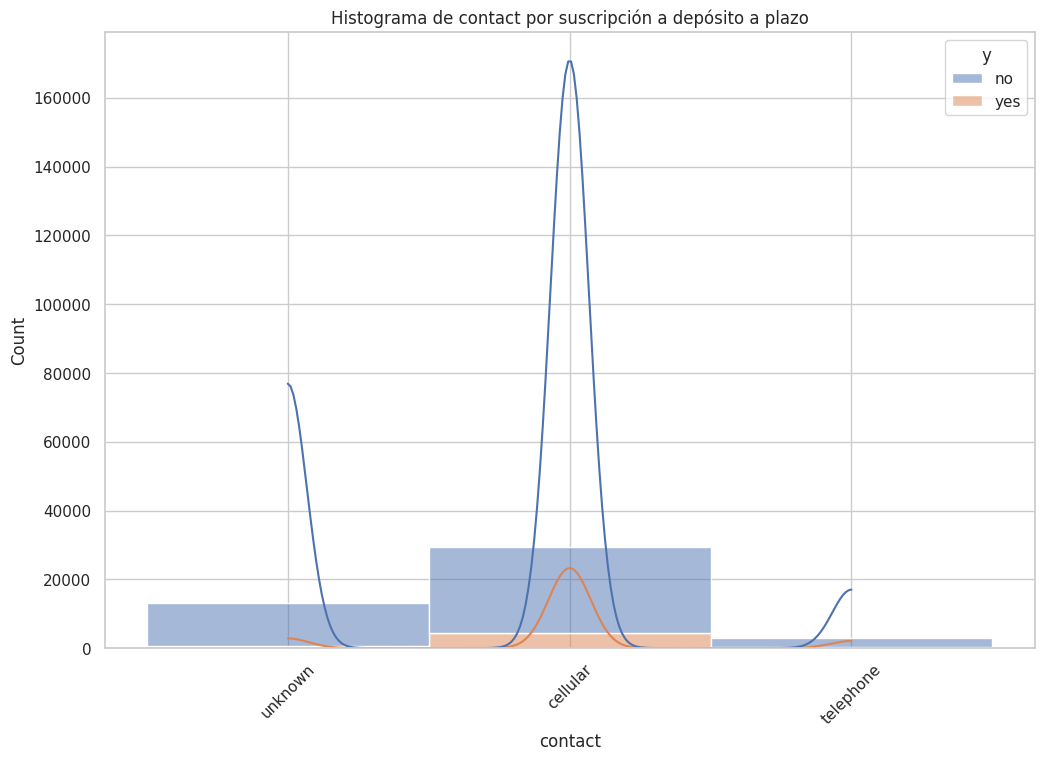

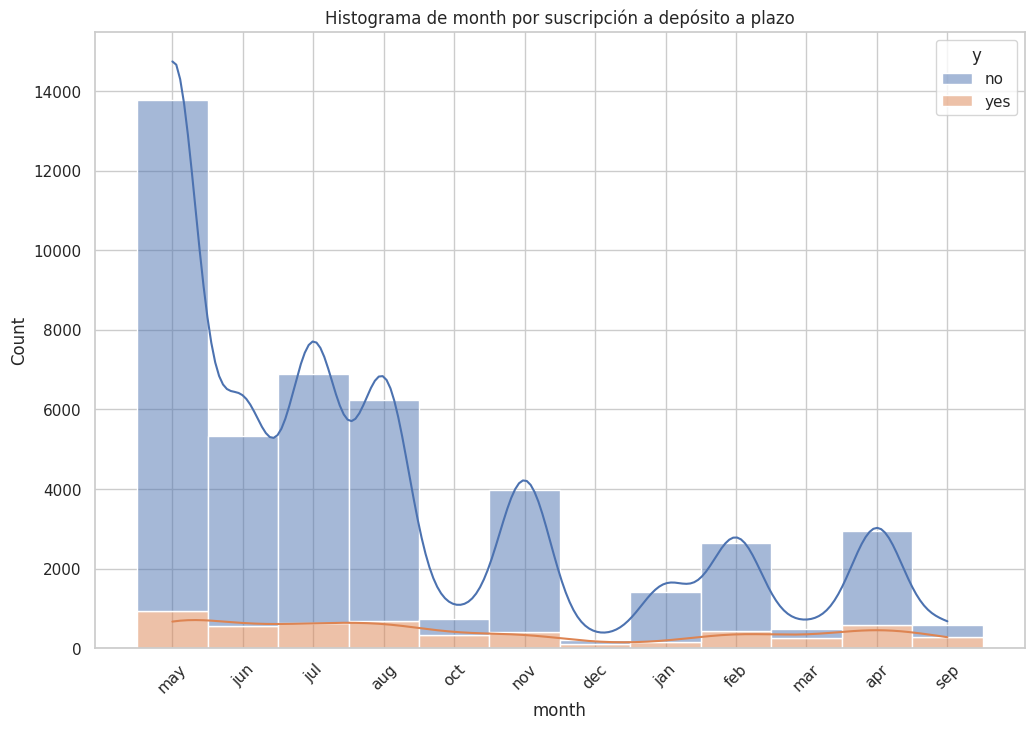

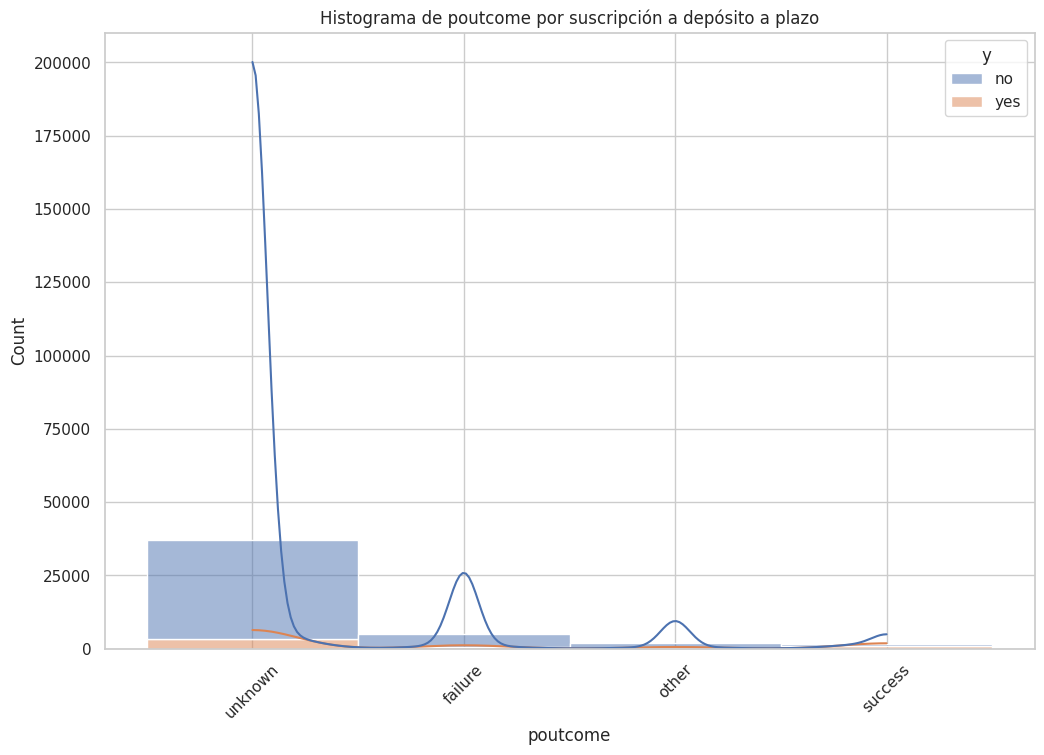

In [13]:
# Configuración del estilo de seaborn
sns.set(style='whitegrid', context='notebook')

# Crear histogramas para todas las variables numéricas separadas por la variable y
for col in cat_vars:
    plt.figure(figsize=(12, 8))
    sns.histplot(data=datos, x=col, hue='y', multiple='stack', bins=50, kde=True)

    # Título y etiquetas
    plt.title(f'Histograma de {col} por suscripción a depósito a plazo')
    plt.xlabel(col)
    plt.ylabel('Count')

    # Rotar etiquetas del eje x
    plt.xticks(rotation=45)

    # Mostrar el gráfico
    plt.show()

> + Gráfico de correlacion

Se realiza un análisis de las relaciones entre variables numéricas en un conjunto de datos, excluyendo las variables categóricas. Para lograr esto, se seleccionan únicamente las columnas que contienen datos de tipo float64 e int64. A continuación, se calcula la matriz de correlación de estas variables numéricas para entender cómo se relacionan entre sí. Esta matriz se visualiza mediante un mapa de calor (heatmap) utilizando la biblioteca seaborn, donde los coeficientes de correlación se anotan sobre el gráfico y se colorean en una escala de color "coolwarm" para facilitar la interpretación visual de las relaciones. La figura resultante proporciona una herramienta útil para identificar patrones y posibles colinealidades entre las variables numéricas del conjunto de datos.

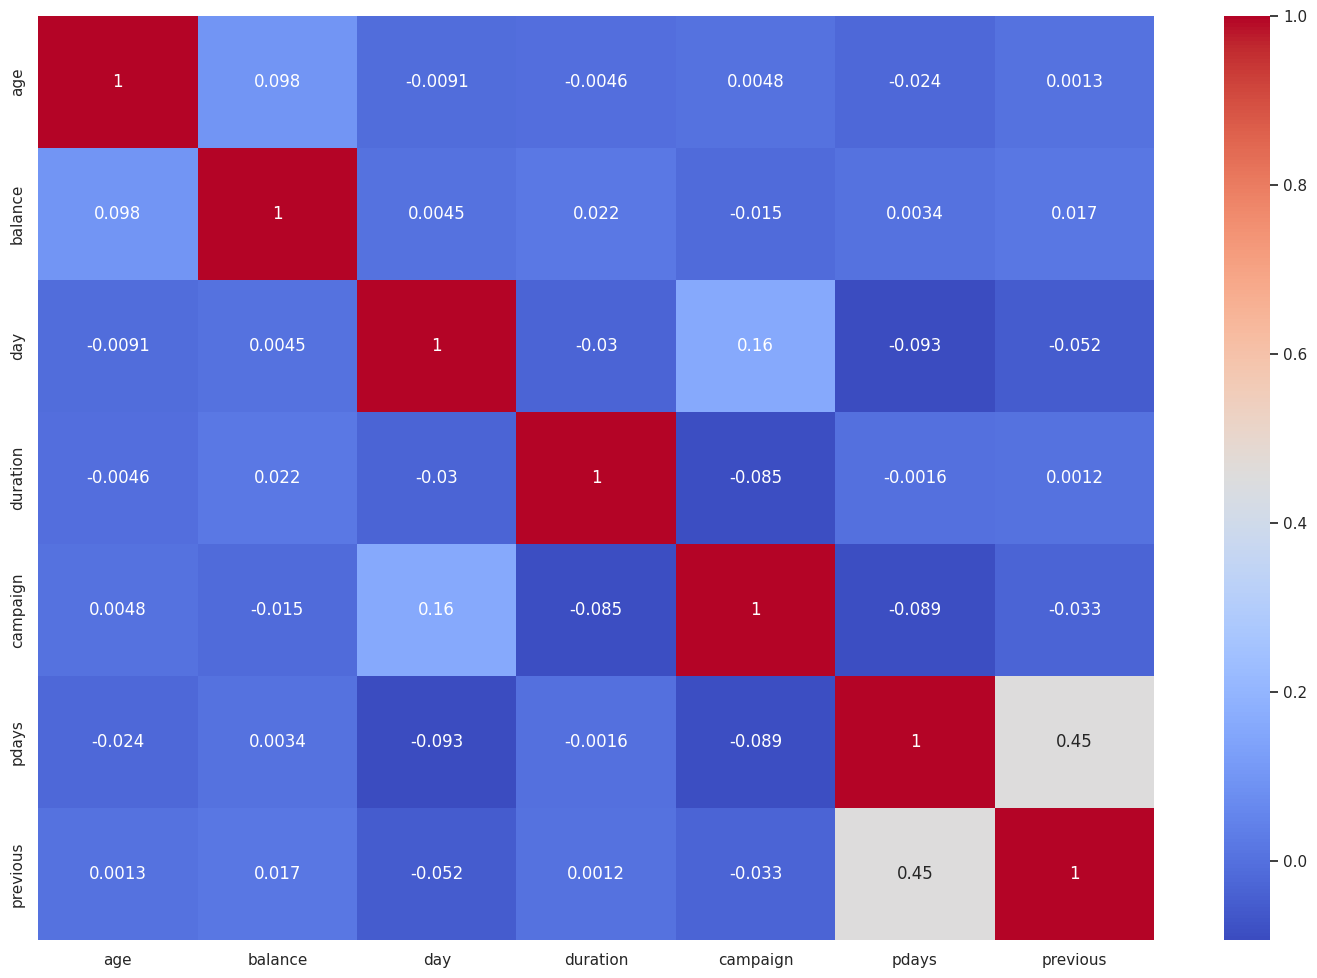

In [14]:
# Excluir las variables categóricas
datos_numericos = datos.select_dtypes(include=['float64', 'int64'])

# Matriz de correlación
fig, axs = plt.subplots(figsize=(18, 12))
correlacion = datos_numericos.corr()
sns.heatmap(correlacion, annot=True, cmap="coolwarm", ax=axs)
plt.show()


<Axes: xlabel='y', ylabel='count'>

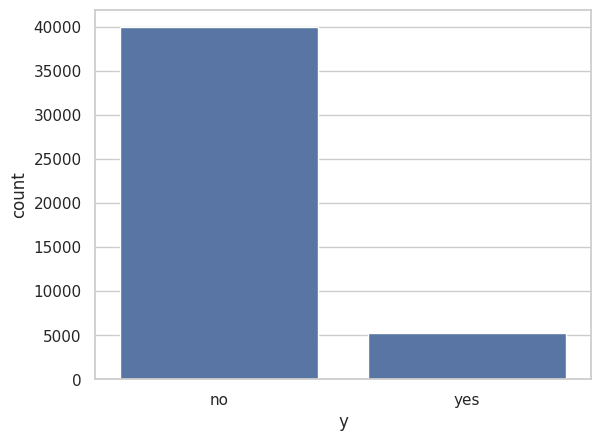

In [15]:
# Visualizar la distribución de la variable objetivo
sns.countplot(x="y", data=datos)

Se puede observar que la barra correspondiente a "no" es mucho más alta que la de "yes", lo que indica un desequilibrio significativo en la distribución de la variable objetivo. Esta situación de desequilibrio de clases es común en problemas de aprendizaje automático.
Ante este escenario, es recomendable aplicar técnicas de submuestreo o sobremuestreo, como SMOTE (Synthetic Minority Over-sampling Technique) o ADASYN (Adaptive Synthetic Sampling Approach), para equilibrar las clases minoritarias y mayoritarias. Estas técnicas pueden mejorar el rendimiento de los modelos de aprendizaje automático al evitar un sesgo hacia la clase mayoritaria y facilitar un aprendizaje más efectivo de los patrones de la clase minoritaria.

### **Preprocesamiento**
>- Remover null (si aplica)

`datos.isnull()`: Esta expresión devuelve un DataFrame booleano del mismo tamaño que datos, donde cada celda es True si el valor correspondiente en datos es NaN (faltante) y False de lo contrario.

`sum()`: Llama al método sum() en el DataFrame booleano devuelto por datos.isnull(). Suma los valores booleanos a lo largo de las columnas, ya que el eje predeterminado es 0, lo que da como resultado una Serie que muestra la cantidad de valores faltantes en cada columna.


In [16]:
# Verificar si hay valores faltantes
print(datos.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


>- Encoding
Se transforma la variable categórica "y" en una variable numérica binaria. Utiliza la función `apply` con una expresión lambda que asigna el valor `1` a los clientes clasificados como "yes" (clientes que han abandonado) y el valor `0` a los demás. El resultado es una serie `y` que contiene estos valores binarios, facilitando el procesamiento y análisis posteriores.

In [17]:
# Convertir la variable objetivo en numérica
datos["y"]= datos["y"].apply(lambda x: 1 if x=="yes" else 0)
# Verificar la codificación
print(datos['y'].value_counts())

y
0    39922
1     5289
Name: count, dtype: int64


>- Division de variables x (atributos) - y(objetivo)

In [18]:
# Identificar las características (X) y la variable objetivo (y)
X = datos[num_vars + cat_vars]
y = datos['y']

# Verificar las dimensiones de X e y
print("Dimensiones de X:", X.shape)
print("Dimensiones de y:", y.shape)

Dimensiones de X: (45211, 16)
Dimensiones de y: (45211,)


In [19]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
# Eliminar las columnas innecesarias X
# Crear instancia de OneHotEncoder
onehot_encoder = OneHotEncoder(drop='first')
#Lista de columnas a usar
_col = cat_vars
# Ajustar y transformar los datos
onehot_encoder_fit = onehot_encoder.fit_transform(datos.loc[:, _col]).toarray()
# Crear un nuevo DataFrame con los datos codificados
x_onehot_encoder = pd.DataFrame(onehot_encoder_fit
                                    , columns=onehot_encoder.get_feature_names_out(input_features= _col)
                                )
#x_onehot_encoder
x = datos[datos.columns[~datos.columns.isin(cat_vars)]].drop(["y"], axis=1)
x = pd.concat([x, x_onehot_encoder], axis = 1)

### Oversamplig
aplicar las siguientes tenicas:
> - SMOTE

SMOTE es una técnica de sobremuestreo utilizada en problemas de aprendizaje automático donde existe un desequilibrio significativo entre las clases. Su objetivo es generar nuevas instancias sintéticas de la clase minoritaria mediante la interpolación de las instancias existentes de esa clase con sus vecinos más cercanos. De esta manera, se aumenta el número de ejemplos de la clase minoritaria, equilibrando su representación en el conjunto de datos.

La técnica SMOTE funciona seleccionando aleatoriamente una instancia de la clase minoritaria y luego calculando sus k vecinos más cercanos de la misma clase. A continuación, se crea una nueva instancia sintética mediante la interpolación de la instancia original con uno de sus vecinos más cercanos.
Este proceso se repite hasta que se alcanza el nivel de sobremuestreo deseado para la clase minoritaria.

1. **`SMOTE(random_state=111, sampling_strategy=.5, k_neighbors=30)`:** Se crea un objeto smote de la clase SMOTE de la librería `imbalanced-learn.` Los parámetros especificados son:

2. **`random_state=111`:** Establece una semilla para el generador de números aleatorios, lo que asegura la reproducibilidad de los resultados.

3. **`sampling_strategy=.5`:** Indica que se desea equilibrar las clases, de modo que la clase minoritaria tendrá aproximadamente el 50% de las instancias de la clase mayoritaria después del sobremuestreo.

4. **`k_neighbors=30`:** Especifica que se deben considerar los 30 vecinos más cercanos para generar las nuevas instancias sintéticas.

5. **`X_smote, y_smote = smote.fit_resample(X, y)`:** Se aplica la técnica SMOTE al conjunto de datos original X y la variable objetivo y. El método fit_resample realiza el sobremuestreo y devuelve los nuevos conjuntos de datos `X_smote` y `y_smote` con las clases balanceadas.

6. **`sns.countplot(x=y_smote)`:** Se utiliza la función countplot de la librería seaborn para visualizar el recuento o frecuencia de cada clase en la variable objetivo y_smote después de aplicar SMOTE. Esta línea de código genera el gráfico de barras que se muestra en la imagen.

<Axes: xlabel='y', ylabel='count'>

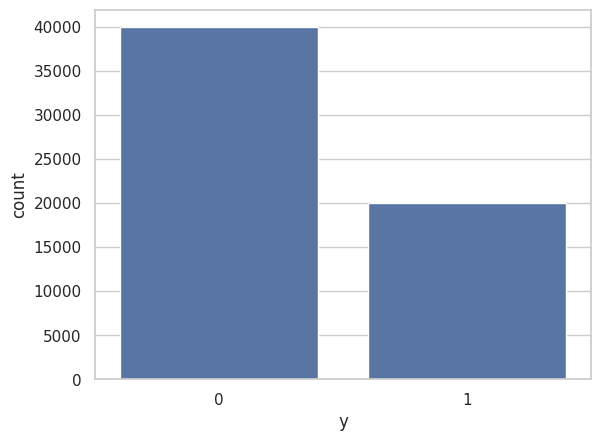

In [40]:
# Aplicar sobremuestreo con SMOTE
smote = SMOTE(random_state=111
              , sampling_strategy=.5
              , k_neighbors= 30
             )
X_smote, y_smote = smote.fit_resample(x, y)
sns.countplot(x=y_smote)

In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
pd.concat([X_smote, y_smote]).to_csv('smote.csv')
# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Entrenar un modelo
modelo_smote = DecisionTreeClassifier()
modelo_smote.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_smote = modelo_smote.predict(X_test)

# Calcular las métricas
precision_smote = precision_score(y_test, y_pred_smote)
recall_smote = recall_score(y_test, y_pred_smote)
f1_smote = f1_score(y_test, y_pred_smote)

print("SMOTE:")
print(f"Precisión: {precision_smote:.2f}, Recall: {recall_smote:.2f}, F1-score: {f1_smote:.2f}")

SMOTE:
Precisión: 0.84, Recall: 0.85, F1-score: 0.85




*   **ADASYN**<br>
ADASYN (Adaptive Synthetic Sampling) es una técnica de sobremuestreo que aborda el desbalance de clases generando ejemplos sintéticos para la clase minoritaria. Se enfoca en las muestras minoritarias más difíciles de clasificar, calculando una distribución de generación basada en la dificultad de clasificación usando k-NN (k-Nearest Neighbors). Los ejemplos sintéticos se crean interpolando entre una muestra minoritaria y sus vecinos más cercanos, priorizando las muestras más difíciles. Esto resulta en un conjunto de datos más balanceado, mejorando la capacidad del modelo para aprender de las clases minoritarias.




<Axes: xlabel='y', ylabel='count'>

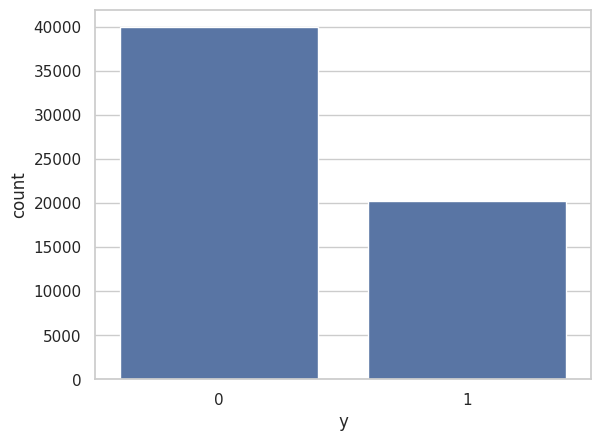

In [22]:
# Aplicar sobremuestreo con ADASYN
adasyn = ADASYN(random_state=111
                , sampling_strategy=.5
                , n_neighbors= 30

             )
X_adasyn, y_adasyn = adasyn.fit_resample(x, y)
# Verificar si la distribución de la variable objetivo ha cambiado después de aplicar ADASYN
sns.countplot(x=y_adasyn)

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
pd.concat([X_adasyn, y_adasyn]).to_csv('smote_adasyn.csv')
# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_adasyn, y_adasyn, test_size=0.2, random_state=42)

# Entrenar un modelo
modelo_adasyn = DecisionTreeClassifier()
modelo_adasyn.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_adasyn = modelo_adasyn.predict(X_test)

# Calcular las métricas
precision_adasyn = precision_score(y_test, y_pred_adasyn)
recall_adasyn = recall_score(y_test, y_pred_adasyn)
f1_adasyn = f1_score(y_test, y_pred_adasyn)

print("ADASYN:")
print(f"Precisión: {precision_adasyn:.2f}, Recall: {recall_adasyn:.2f}, F1-score: {f1_adasyn:.2f}")

ADASYN:
Precisión: 0.85, Recall: 0.86, F1-score: 0.86




*   **BOOSTING**

Es una técnica de ensamblado que crea un modelo fuerte a partir de múltiples modelos débiles. Se enfoca en mejorar el rendimiento del modelo mediante el ajuste de pesos de las observaciones. A diferencia del submuestreo (undersampling) que reduce el tamaño de la clase mayoritaria, y del sobremuestreo (oversampling) que aumenta el tamaño de la clase minoritaria, Boosting no se centra en el equilibrio de clases, sino en mejorar la precisión general del modelo mediante la construcción de modelos secuenciales.

### **Características del Boosting:**
1. **Secuencialidad**: Los modelos se construyen uno tras otro, cada uno mejorando a su predecesor.
2. **Ajuste de pesos**: Cada instancia mal clasificada se le asigna un mayor peso para la siguiente iteración.
3. **Enfoque en errores**: Se centra en corregir los errores cometidos por modelos anteriores.

### **Tipos de Boosting:**
1. **AdaBoost**: Ajusta los pesos de las observaciones basándose en los errores cometidos por modelos anteriores.
2. **Gradient Boosting**: Minimiza una función de pérdida mediante la construcción de modelos en etapas.
3. **Balanced Random Forest**: Un bosque aleatorio modificado para manejar datos desequilibrados.





Precisión de AdaBoost: 0.8977109366360722
Precisión de Gradient Boosting: 0.9035718235098972


<ipython-input-42-58f01e42b343>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='Set2')
<ipython-input-42-58f01e42b343>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred_ada, palette='Set2')
<ipython-input-42-58f01e42b343>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred_gradient, palette='Set2')


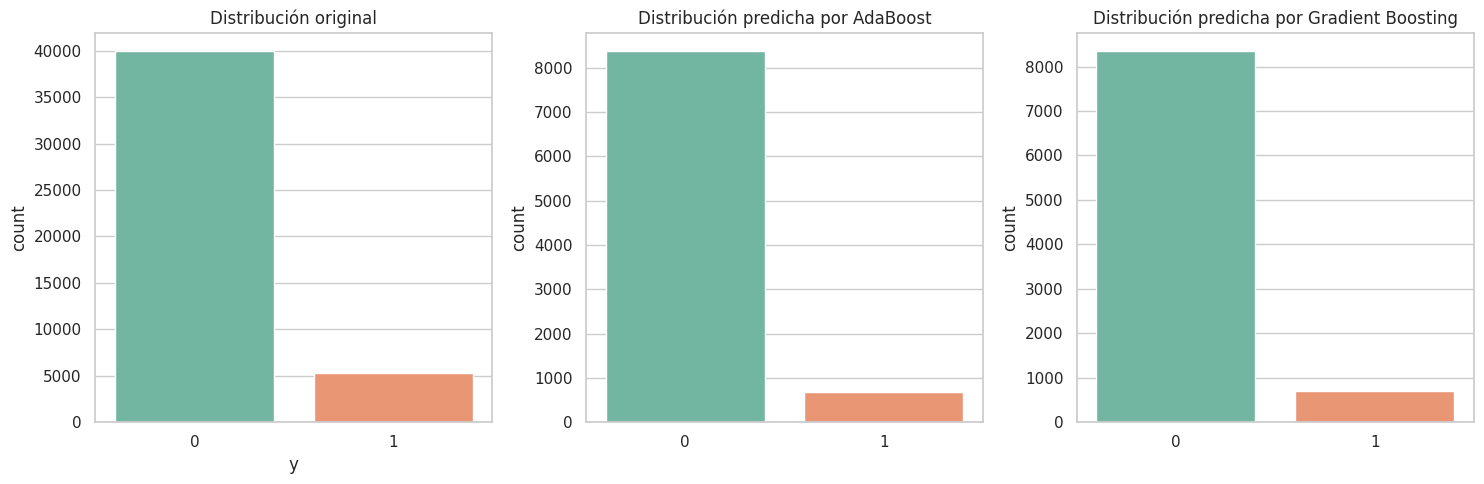

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Definir los clasificadores AdaBoost y Gradient Boosting
ada_boost = AdaBoostClassifier(random_state=42)
gradient_boost = GradientBoostingClassifier(random_state=42)

# Entrenar los clasificadores
ada_boost.fit(X_train, y_train)
gradient_boost.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_ada = ada_boost.predict(X_test)
y_pred_gradient = gradient_boost.predict(X_test)

# Calcular la precisión de AdaBoost
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print("Precisión de AdaBoost:", accuracy_ada)

# Calcular la precisión de Gradient Boosting
accuracy_gradient = accuracy_score(y_test, y_pred_gradient)
print("Precisión de Gradient Boosting:", accuracy_gradient)

# Visualizar la distribución de las clases original
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x=y, palette='Set2')
plt.title('Distribución original')

# Visualizar la distribución de las clases predichas por AdaBoost
plt.subplot(1, 3, 2)
sns.countplot(x=y_pred_ada, palette='Set2')
plt.title('Distribución predicha por AdaBoost')

# Visualizar la distribución de las clases predichas por Gradient Boosting
plt.subplot(1, 3, 3)
sns.countplot(x=y_pred_gradient, palette='Set2')
plt.title('Distribución predicha por Gradient Boosting')

plt.tight_layout()
plt.show()



* **SmoteBoost**

SMOTEBoost es una técnica que combina el sobremuestreo de la clase minoritaria con el algoritmo de boosting AdaBoost. Primero, se aplica SMOTE para generar instancias sintéticas de la clase minoritaria y equilibrar las clases. Luego, se entrena un conjunto de clasificadores débiles (en este caso, árboles de decisión) en los datos sobremuestreados utilizando AdaBoost. Esto permite que los clasificadores débiles se enfoquen en las instancias difíciles y las de la clase minoritaria, mejorando el rendimiento general del modelo en problemas con desequilibrio de clases.

**`AdaBoostClassifier(n_estimators=100, algorithm='SAMME.R', random_state=42)` :** crea un clasificador AdaBoost con 100 árboles de decisión y utiliza el algoritmo 'SAMME.R'.

**`fit(X_smote, y_smote)`:** Entrena el modelo utilizando los datos balanceados.

**`predict(X_smote)`:** Predice las clases para los datos balanceados.



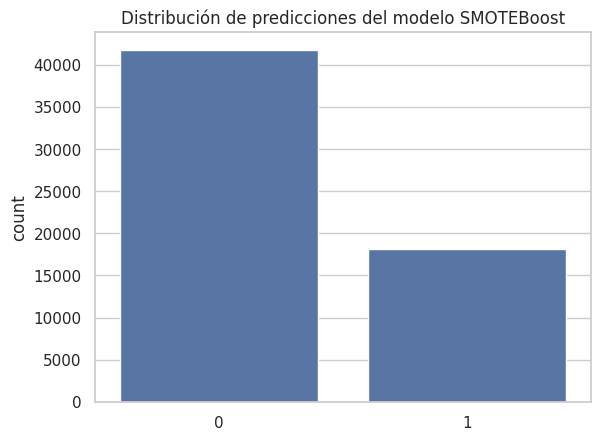

In [24]:
from sklearn.ensemble import AdaBoostClassifier
# Aplicar SMOTE
smote = SMOTE(random_state=111, sampling_strategy=0.5, k_neighbors=30)
X_smote, y_smote = smote.fit_resample(x, y)

# Crear y ajustar el modelo SMOTEBoost
smote_boost = AdaBoostClassifier(n_estimators=100,
                                 algorithm='SAMME.R',
                                 random_state=42)
smote_boost.fit(X_smote, y_smote)

# Verificar la distribución de la variable objetivo después de aplicar SMOTEBoost
y_pred_smote_boost = smote_boost.predict(X_smote)
sns.countplot(x=y_pred_smote_boost)

# Mostrar el gráfico
plt.title('Distribución de predicciones del modelo SMOTEBoost')
plt.show()

In [25]:
# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Realizar predicciones en el conjunto de prueba
y_pred_smote_boost = smote_boost.predict(X_test)

# Calcular las métricas
precision_smote_boost = precision_score(y_test, y_pred_smote_boost)
recall_smote_boost = recall_score(y_test, y_pred_smote_boost)
f1_smote_boost = f1_score(y_test, y_pred_smote_boost)

print("SMOTEBoost:")
print(f"Precisión: {precision_smote_boost:.2f}, Recall: {recall_smote_boost:.2f}, F1-score: {f1_smote_boost:.2f}")

SMOTEBoost:
Precisión: 0.92, Recall: 0.84, F1-score: 0.88


> *   Tomek Links

Tomek Links es una técnica de submuestreo utilizada para mejorar el balance de clases en conjuntos de datos desbalanceados. Su objetivo es eliminar ejemplos ruidosos y potencialmente redundantes de la clase mayoritaria. Un Tomek Link se define como un par de ejemplos de diferentes clases que son los más cercanos entre sí según alguna medida de distancia (por ejemplo, la distancia euclidiana).

`TomekLinks()`: Crea un objeto de la clase TomekLinks.

`fit_resample(X_train, y_train)`: Aplica la técnica de Tomek Links al conjunto de datos de entrenamiento, eliminando ejemplos ruidosos de la clase mayoritaria.

In [27]:
!pip install -q imbalanced-learn
from imblearn.under_sampling import TomekLinks

In [28]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Crear una instancia de TomekLinks
tomek_links = TomekLinks()

# Aplicar Tomek Links para eliminar ejemplos ruidosos
X_train_resampled, y_train_resampled = tomek_links.fit_resample(X_train, y_train)

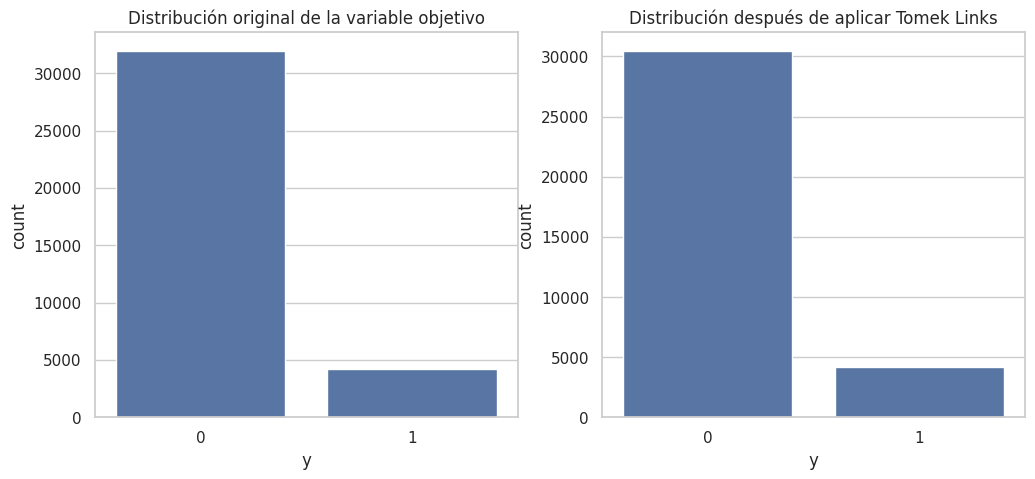

In [29]:
# Crear una figura con subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de barras para la distribución original de la variable objetivo
sns.countplot(x=y_train, ax=axs[0])
axs[0].set_title('Distribución original de la variable objetivo')

# Gráfico de barras para la distribución después de aplicar Tomek Links
sns.countplot(x=y_train_resampled, ax=axs[1])
axs[1].set_title('Distribución después de aplicar Tomek Links')

plt.show()

In [30]:
modelo_tomek = DecisionTreeClassifier()
modelo_tomek.fit(X_train_resampled, y_train_resampled)

y_pred_tomek = modelo_tomek.predict(X_test)

# Calcular las métricas de evaluación del modelo
precision_tomek = precision_score(y_test, y_pred_tomek)
recall_tomek = recall_score(y_test, y_pred_tomek)
f1_tomek = f1_score(y_test, y_pred_tomek)

print("Tomek Links:")
print(f"Precisión: {precision_tomek:.2f}, Recall: {recall_tomek:.2f}, F1-score: {f1_tomek:.2f}")

Tomek Links:
Precisión: 0.47, Recall: 0.53, F1-score: 0.50
